In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

ds_train=tf.keras.utils.image_dataset_from_directory(
    r"I:\Awais\AI\DL\Cats n dogs data\train",
    image_size=(128,128),
    batch_size=32,
    label_mode="binary")
ds_val=tf.keras.utils.image_dataset_from_directory(
    r"I:\Awais\AI\DL\Cats n dogs data\val",
    batch_size=32,
    image_size=(128,128),
    label_mode="binary")
def preprocess(image,label):
    image=preprocess_input(tf.cast(image,tf.float32))
    return image,label
ds_train=ds_train.map(preprocess).prefetch(tf.data.AUTOTUNE)
ds_val=ds_val.map(preprocess).prefetch(tf.data.AUTOTUNE)

Found 859 files belonging to 2 classes.
Found 141 files belonging to 2 classes.


In [22]:
base_model=MobileNetV2(input_shape=(128,128,3),include_top=False)
base_model.trainable=False
model=tf.keras.Sequential([
    base_model,
    layers.Flatten(),
    
    layers.Dense(units=128,use_bias=False,kernel_initializer="he_normal",kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Activation("swish"),
    layers.Dropout(0.3),
    
    layers.Dense(units=32,use_bias=False,kernel_initializer="he_normal",kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Activation("swish"),
    layers.Dropout(0.3),
    
    layers.Dense(units=16,use_bias=False,kernel_initializer="he_normal",kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Activation("swish"),
    layers.Dropout(0.3),

    layers.Dense(units=1,use_bias=False,kernel_initializer="he_normal",kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Activation("sigmoid")
])
initial_weights=model.get_weights()

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 324ms/step - accuracy: 0.7811 - loss: 4.0613 - val_accuracy: 0.9149 - val_loss: 3.7880
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 238ms/step - accuracy: 0.9220 - loss: 3.9139 - val_accuracy: 0.9433 - val_loss: 3.7478
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.9383 - loss: 3.8569 - val_accuracy: 0.9716 - val_loss: 3.7179
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - accuracy: 0.9464 - loss: 3.8070 - val_accuracy: 0.9858 - val_loss: 3.6902
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 238ms/step - accuracy: 0.9593 - loss: 3.7487 - val_accuracy: 0.9858 - val_loss: 3.6585
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 239ms/step - accuracy: 0.9476 - loss: 3.7089 - val_accuracy: 0.9858 - val_loss: 3.6229
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 239ms/step - accuracy: 0.9709 - loss: 3.6567 - val_accuracy: 0.9858 - val_loss: 3.5870
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - accuracy: 0.9709 - loss: 3.6039 - val_accuracy: 0

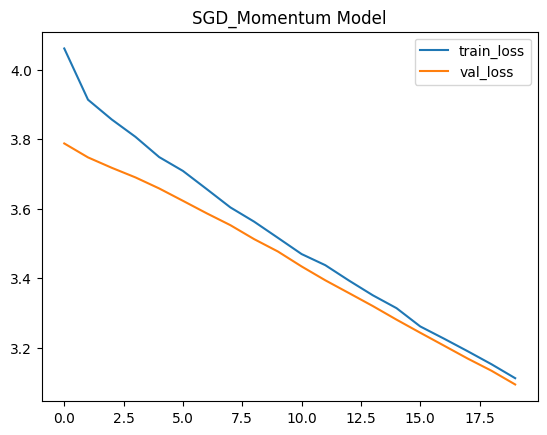

In [23]:
model.set_weights(initial_weights)
sgd_momentum=tf.keras.optimizers.SGD(momentum=0.9,learning_rate=0.001)
model.compile(loss="binary_crossentropy",optimizer=sgd_momentum,metrics=["accuracy"])
history=model.fit(ds_train,validation_data=ds_val,epochs=20,callbacks=[EarlyStopping(patience=10,monitor="val_loss",restore_best_weights=True)])
plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.title("SGD_Momentum Model")

plt.legend()
plt.show()

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 304ms/step - accuracy: 0.7870 - loss: 4.0594 - val_accuracy: 0.9291 - val_loss: 3.7857
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 240ms/step - accuracy: 0.9139 - loss: 3.9178 - val_accuracy: 0.9716 - val_loss: 3.7528
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 239ms/step - accuracy: 0.9383 - loss: 3.8566 - val_accuracy: 0.9716 - val_loss: 3.7292
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.9348 - loss: 3.8105 - val_accuracy: 0.9858 - val_loss: 3.6980
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 239ms/step - accuracy: 0.9546 - loss: 3.7481 - val_accuracy: 0.9858 - val_loss: 3.6615
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 241ms/step - accuracy: 0.9534 - loss: 3.7081 - val_accuracy: 0.9858 - val_loss: 3.6261
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 238ms/step - accuracy: 0.9662 - loss: 3.6492 - val_accuracy: 0.9858 - val_loss: 3.5901
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 242ms/step - accuracy: 0.9721 - loss: 3.6071 - val_accuracy: 0

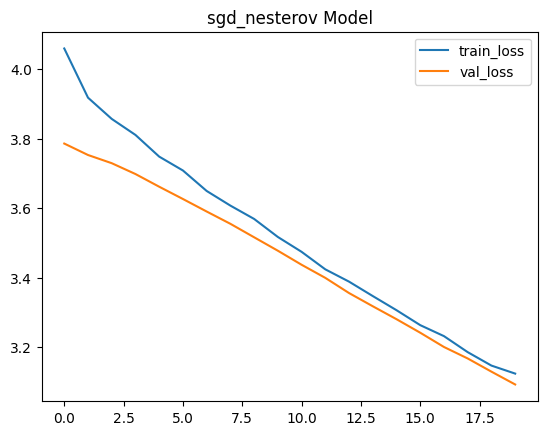

In [24]:
model.set_weights(initial_weights)
sgd_nesterov=tf.keras.optimizers.SGD(momentum=0.9,learning_rate=0.001,nesterov=True)
model.compile(loss="binary_crossentropy",optimizer=sgd_nesterov,metrics=["accuracy"])
history=model.fit(ds_train,validation_data=ds_val,epochs=20,callbacks=EarlyStopping(patience=10,monitor="val_loss",restore_best_weights=True))
plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.title("sgd_nesterov Model")

plt.legend()
plt.show()

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 319ms/step - Accuracy: 0.7299 - loss: 4.1033 - val_Accuracy: 0.8582 - val_loss: 3.9392
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - Accuracy: 0.8824 - loss: 3.9672 - val_Accuracy: 0.9078 - val_loss: 3.8899
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 250ms/step - Accuracy: 0.9092 - loss: 3.9476 - val_Accuracy: 0.9504 - val_loss: 3.8720
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - Accuracy: 0.8964 - loss: 3.9348 - val_Accuracy: 0.9645 - val_loss: 3.8502
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - Accuracy: 0.9267 - loss: 3.9046 - val_Accuracy: 0.9716 - val_loss: 3.8415
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - Accuracy: 0.9348 - loss: 3.8963 - val_Accuracy: 0.9716 - val_loss: 3.8341
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - Accuracy: 0.9325 - loss: 3.8755 - val_Accuracy: 0.9858 - val_loss: 3.8242
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - Accuracy: 0.9313 - loss: 3.8628 - val_Accuracy: 0

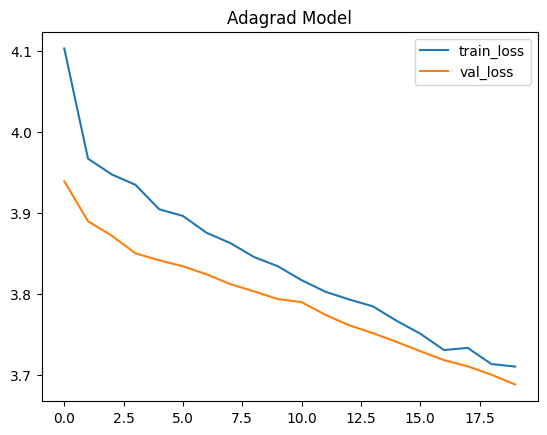

In [26]:
model.set_weights(initial_weights)
adagrad=tf.keras.optimizers.Adagrad(learning_rate=0.001)
model.compile(loss="binary_crossentropy",optimizer=adagrad,metrics=["Accuracy"])
history=model.fit(ds_train,validation_data=ds_val,epochs=20,callbacks=EarlyStopping(patience=10,monitor="val_loss",restore_best_weights=True))
plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.title("Adagrad Model")

plt.legend()
plt.show()

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 16s 338ms/step - Accuracy: 0.9115 - loss: 2.9879 - val_Accuracy: 0.9149 - val_loss: 1.9252
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - Accuracy: 0.9686 - loss: 1.6014 - val_Accuracy: 0.9574 - val_loss: 1.1430
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - Accuracy: 0.9651 - loss: 1.1142 - val_Accuracy: 0.9716 - val_loss: 0.9191
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 265ms/step - Accuracy: 0.9686 - loss: 0.9137 - val_Accuracy: 0.9716 - val_loss: 0.8781
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - Accuracy: 0.9802 - loss: 0.7795 - val_Accuracy: 0.9858 - val_loss: 0.7791
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - Accuracy: 0.9790 - loss: 0.6819 - val_Accuracy: 0.9645 - val_loss: 0.7325
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 246ms/step - Accuracy: 0.9790 - loss: 0.6192 - val_Accuracy: 0.9433 - val_loss: 0.6927
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step - Accuracy: 0.9872 - loss: 0.5548 - val_Accuracy: 0

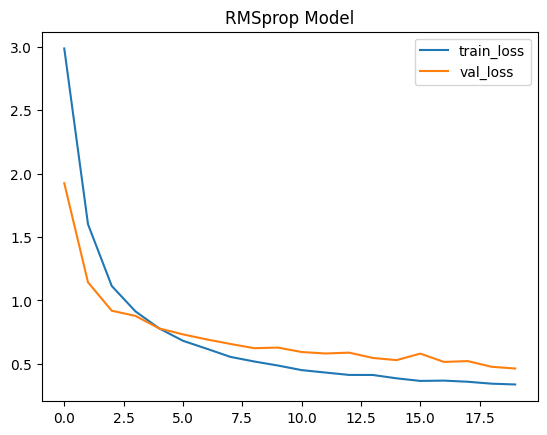

In [ ]:
model.set_weights(initial_weights)
rmsprop=tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9)
model.compile(loss="binary_crossentropy",optimizer=rmsprop,metrics=["Accuracy"])
history=model.fit(ds_train,validation_data=ds_val,epochs=20,callbacks=EarlyStopping(patience=10,monitor="val_loss",restore_best_weights=True))
plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.title("RMSprop Model")

plt.legend()
plt.show()

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 16s 336ms/step - Accuracy: 0.8976 - loss: 3.3105 - val_Accuracy: 0.9645 - val_loss: 2.2258
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - Accuracy: 0.9627 - loss: 1.9537 - val_Accuracy: 0.9858 - val_loss: 1.3765
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 265ms/step - Accuracy: 0.9674 - loss: 1.3005 - val_Accuracy: 0.9929 - val_loss: 1.1147
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 271ms/step - Accuracy: 0.9814 - loss: 1.0420 - val_Accuracy: 0.9858 - val_loss: 0.9920
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 278ms/step - Accuracy: 0.9767 - loss: 0.9039 - val_Accuracy: 0.9787 - val_loss: 0.8842
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 276ms/step - Accuracy: 0.9837 - loss: 0.7671 - val_Accuracy: 0.9787 - val_loss: 0.7836
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - Accuracy: 0.9767 - loss: 0.6778 - val_Accuracy: 0.9645 - val_loss: 0.7768
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 277ms/step - Accuracy: 0.9779 - loss: 0.6179 - val_Accuracy: 0

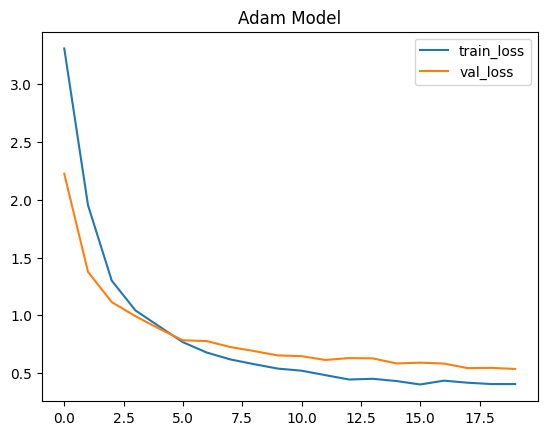

In [31]:
model.set_weights(initial_weights)
adam_opt=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(loss="binary_crossentropy",optimizer=adam_opt,metrics=["Accuracy"])
history=model.fit(ds_train,validation_data=ds_val,epochs=20,callbacks=EarlyStopping(patience=10,monitor="val_loss",restore_best_weights=True))
plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.title("Adam Model")

plt.legend()
plt.show()

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 362ms/step - Accuracy: 0.9150 - loss: 3.0595 - val_Accuracy: 0.9149 - val_loss: 1.9314
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 274ms/step - Accuracy: 0.9721 - loss: 1.6017 - val_Accuracy: 0.9645 - val_loss: 1.1504
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - Accuracy: 0.9732 - loss: 1.0374 - val_Accuracy: 0.9787 - val_loss: 0.9332
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - Accuracy: 0.9802 - loss: 0.8059 - val_Accuracy: 0.9787 - val_loss: 0.8244
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 274ms/step - Accuracy: 0.9686 - loss: 0.6646 - val_Accuracy: 0.9716 - val_loss: 0.7357
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 279ms/step - Accuracy: 0.9721 - loss: 0.5971 - val_Accuracy: 0.9716 - val_loss: 0.7527
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 302ms/step - Accuracy: 0.9825 - loss: 0.5391 - val_Accuracy: 0.9645 - val_loss: 0.6840
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 279ms/step - Accuracy: 0.9779 - loss: 0.4992 - val_Accuracy: 0

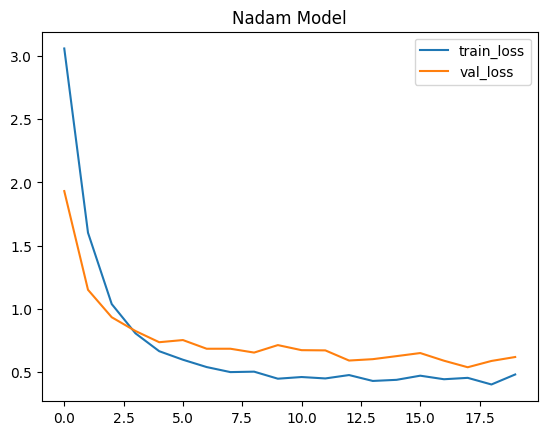

In [34]:
model.set_weights(initial_weights)
nadam=tf.keras.optimizers.Nadam(learning_rate=0.002,beta_1=0.9,beta_2=0.999)
model.compile(loss="binary_crossentropy",optimizer=nadam,metrics=["Accuracy"])
history=model.fit(ds_train,validation_data=ds_val,epochs=20,callbacks=EarlyStopping(patience=10,monitor="val_loss",restore_best_weights=True))
plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.title("Nadam Model")

plt.legend()
plt.show()

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 17s 343ms/step - Accuracy: 0.9092 - loss: 3.2876 - val_Accuracy: 1.0000 - val_loss: 2.1805
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 278ms/step - Accuracy: 0.9604 - loss: 1.9478 - val_Accuracy: 0.9858 - val_loss: 1.4002
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 276ms/step - Accuracy: 0.9790 - loss: 1.3046 - val_Accuracy: 0.9716 - val_loss: 1.1243
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 276ms/step - Accuracy: 0.9662 - loss: 1.0405 - val_Accuracy: 0.9787 - val_loss: 1.0187
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 283ms/step - Accuracy: 0.9802 - loss: 0.8982 - val_Accuracy: 0.9787 - val_loss: 0.8892
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 276ms/step - Accuracy: 0.9872 - loss: 0.7749 - val_Accuracy: 0.9858 - val_loss: 0.8245
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 293ms/step - Accuracy: 0.9837 - loss: 0.6871 - val_Accuracy: 0.9929 - val_loss: 0.7600
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 284ms/step - Accuracy: 0.9756 - loss: 0.6274 - val_Accuracy: 0

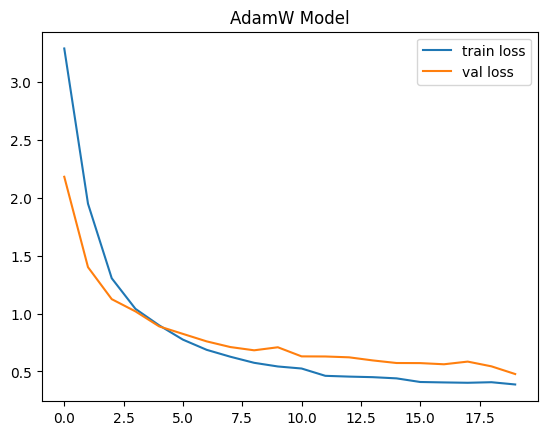

In [38]:
model.set_weights(initial_weights)

adamw=tf.keras.optimizers.AdamW(learning_rate=0.001,weight_decay=0.0001)
model.compile(loss="binary_crossentropy",optimizer=adamw,metrics=["Accuracy"])
history=model.fit(ds_train,validation_data=ds_val,epochs=20,callbacks=EarlyStopping(restore_best_weights=True,monitor="val_loss",patience=10))

plt.plot(history.history["loss"],label="train loss")
plt.plot(history.history["val_loss"],label="val loss")
plt.title("AdamW Model")
plt.legend()
plt.show()